<a href="https://colab.research.google.com/github/blessjal/blessjal/blob/main/dnn_uams_brca_min.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier
import matplotlib.pyplot as plt



In [2]:
df = pd.read_excel('/content/uams_brca_min.xlsx')

df.head()

,Age at Diagnosis,Race 1,er,pr,her2,Path Ajcc Stage Group,Clinical Ajcc Stage Group,Combined Last Status,Combined Cancer Status,Surgery,Chemotherapy,Hormone/steroid Therapy,Immunotherapy,Phase I Radiation Treatment Modality
0,74,White,NaN,NaN,NaN,3.0,2.0,0,0,9.0,3.0,1.0,99.0,1.0
1,74,White,NaN,NaN,NaN,3.0,2.0,0,0,54.0,3.0,1.0,99.0,1.0
2,80,White,NaN,NaN,NaN,99.0,1.0,0,0,9.0,99.0,99.0,99.0,99.0
3,80,White,NaN,NaN,NaN,99.0,1.0,0,0,22.0,99.0,99.0,99.0,99.0
4,61,White,NaN,NaN,NaN,99.0,1.0,0,0,2.0,99.0,1.0,99.0,99.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27684 entries, 0 to 27683
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Age at Diagnosis                      27684 non-null  int64  
 1   Race 1                                27684 non-null  object 
 2   er                                    25571 non-null  object 
 3   pr                                    25571 non-null  object 
 4   her2                                  25571 non-null  object 
 5   Path Ajcc Stage Group                 21426 non-null  float64
 6   Clinical Ajcc Stage Group             21655 non-null  float64
 7   Combined Last Status                  27684 non-null  int64  
 8   Combined Cancer Status                27684 non-null  int64  
 9   Surgery                               27467 non-null  float64
 10  Chemotherapy                          14716 non-null  float64
 11  Hormone/steroid

In [4]:
le = LabelEncoder()
df['Race 1'] = le.fit_transform(df['Race 1'])
df['er'] = le.fit_transform(df['er'])
df['pr'] = le.fit_transform(df['pr'])
df['her2'] = le.fit_transform(df['her2'])

In [5]:
X = df.drop('Combined Cancer Status', axis=1)
y = df['Combined Cancer Status']

X.shape, y.shape

((27684, 13), (27684,))

In [6]:
label_encoder=LabelEncoder()
label_encoder.fit(y)
y=label_encoder.transform(y)
labels=label_encoder.classes_
classes=np.unique(y)
y=label_binarize(y,classes=np.unique(y))
nclasses=y.shape[1]

In [7]:
labels

array([0, 1, 3])

In [8]:
X.isna().sum()

Age at Diagnosis                            0
Race 1                                      0
er                                          0
pr                                          0
her2                                        0
Path Ajcc Stage Group                    6258
Clinical Ajcc Stage Group                6029
Combined Last Status                        0
Surgery                                   217
Chemotherapy                            12968
Hormone/steroid Therapy                 11884
Immunotherapy                           25133
Phase I Radiation Treatment Modality    21181
dtype: int64

In [9]:
X.fillna(0, inplace=True)

In [10]:
X.isna().sum()

Age at Diagnosis                        0
Race 1                                  0
er                                      0
pr                                      0
her2                                    0
Path Ajcc Stage Group                   0
Clinical Ajcc Stage Group               0
Combined Last Status                    0
Surgery                                 0
Chemotherapy                            0
Hormone/steroid Therapy                 0
Immunotherapy                           0
Phase I Radiation Treatment Modality    0
dtype: int64

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25)

In [12]:
min_max_scaler=MinMaxScaler()
X_train=min_max_scaler.fit_transform(X_train)
X_val=min_max_scaler.fit_transform(X_val)
X_test=min_max_scaler.fit_transform(X_test)

In [16]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

dt_pred = dt.predict(X_test)

dt_accuracy = accuracy_score(dt_pred, y_test)
dt_accuracy

0.9413379569426383

In [21]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn_accuracy = accuracy_score(knn_pred, y_test)
knn_accuracy

0.8786302557433897

In [17]:
rf = RandomForestClassifier()

rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)

rf_accuracy = accuracy_score(rf_pred, y_test)

In [18]:
rf_accuracy

0.949573761017194

In [ ]:
feature_importances = pd.DataFrame(rf.feature_importances_, index =X.columns,  columns=['importance']).sort_values('importance', ascending=False)
feature_importances

,importance
Age at Diagnosis,0.279456
Path Ajcc Stage Group,0.102398
Surgery,0.101414
Clinical Ajcc Stage Group,0.083678
Combined Last Status,0.073049
Chemotherapy,0.066877
her2,0.056723
Hormone/steroid Therapy,0.046332
Phase I Radiation Treatment Modality,0.045372
pr,0.043228


In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

from sklearn.preprocessing import MinMaxScaler

In [ ]:
#define model
model = Sequential()

#hidden layer 1
model.add(Dense(40, input_dim=X_train.shape[1], activation='relu'))

#hidden layer 2
model.add(Dense(20, activation='relu'))

#output layer
model.add(Dense(nclasses, activation='softmax'))

#define optimizer and learning rate. We will use Adam optimizer
opt_adam = keras.optimizers.Adam(learning_rate=0.001)

model.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer=opt_adam, metrics=[keras.metrics.CategoricalAccuracy()])
# model.compile(optimizer='adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])



In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val),  batch_size=32, epochs=10, verbose=1)

Epoch 1/10
487/487 [==============================] - 2s 3ms/step - loss: 0.5186 - categorical_accuracy: 0.7891 - val_loss: 0.4667 - val_categorical_accuracy: 0.7921
Epoch 2/10
487/487 [==============================] - 1s 2ms/step - loss: 0.4698 - categorical_accuracy: 0.8009 - val_loss: 0.4561 - val_categorical_accuracy: 0.8049
Epoch 3/10
487/487 [==============================] - 1s 3ms/step - loss: 0.4605 - categorical_accuracy: 0.8071 - val_loss: 0.4495 - val_categorical_accuracy: 0.8079
Epoch 4/10
487/487 [==============================] - 1s 3ms/step - loss: 0.4528 - categorical_accuracy: 0.8110 - val_loss: 0.4408 - val_categorical_accuracy: 0.8149
Epoch 5/10
487/487 [==============================] - 1s 3ms/step - loss: 0.4472 - categorical_accuracy: 0.8131 - val_loss: 0.4444 - val_categorical_accuracy: 0.8114
Epoch 6/10
487/487 [==============================] - 1s 2ms/step - loss: 0.4451 - categorical_accuracy: 0.8157 - val_loss: 0.4413 - val_categorical_accuracy: 0.8128
Epoc

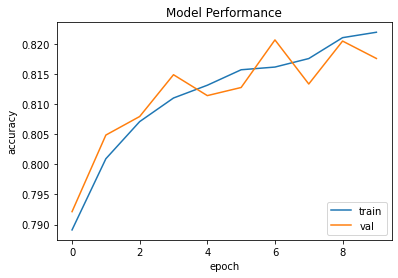

In [ ]:
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('Model Performance')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

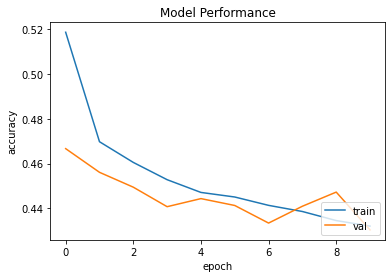

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Performance')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

In [ ]:
predictions = model.predict(X_test)

In [ ]:
np.argmax(predictions[0])

0

In [ ]:
y_test[0:5]

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]])

In [ ]:
labels

array(['no recurrence', 'recurrence', 'unknown'], dtype=object)

In [ ]:
for index, entry in enumerate(predictions[0:5]):
    print('predicted: %d, actual:%d' % (np.argmax(entry), np.argmax(y_test[index])))

predicted: 0, actual:0
predicted: 0, actual:0
predicted: 0, actual:0
predicted: 0, actual:0
predicted: 0, actual:0


In [ ]:
ex1 =X_test[0].tolist()
ex1

[0.7272727272727273,
 1.0,
 0.5,
 0.25,
 0.75,
 0.0,
 0.0,
 1.0,
 0.23232323232323235,
 0.0,
 0.010101010101010102,
 0.0,
 0.0]

In [ ]:
sample1 = np.array(ex1).reshape(1, -1)
sample1

array([[0.72727273, 1.        , 0.5       , 0.25      , 0.75      ,
        0.        , 0.        , 1.        , 0.23232323, 0.        ,
        0.01010101, 0.        , 0.        ]])

In [ ]:
model.predict(sample1)

array([[9.4919997e-01, 5.0677020e-02, 1.2304065e-04]], dtype=float32)

In [ ]:
np.argmax(model.predict(sample1))

0

In [ ]:
labels[0]

'no recurrence'

In [ ]:
ex2 =X_test[12].tolist()
sample2 = np.array(ex2).reshape(1, -1)
model.predict(sample2)

array([[9.0831804e-01, 9.1196902e-02, 4.8502354e-04]], dtype=float32)

In [ ]:
np.argmax(model.predict(sample2))

0

In [ ]:
ex3 =X_test[123].tolist()
sample3 = np.array(ex3).reshape(1, -1)
np.argmax(model.predict(sample3))

1

In [ ]:
labels[1]

'recurrence'

In [ ]:
y_test[123]

array([0, 1, 0])

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val),  batch_size=32, epochs=50, verbose=1)

Epoch 1/50
487/487 [==============================] - 3s 6ms/step - loss: 0.4295 - categorical_accuracy: 0.8216 - val_loss: 0.4282 - val_categorical_accuracy: 0.8195
Epoch 2/50
487/487 [==============================] - 2s 4ms/step - loss: 0.4274 - categorical_accuracy: 0.8218 - val_loss: 0.4268 - val_categorical_accuracy: 0.8191
Epoch 3/50
487/487 [==============================] - 1s 2ms/step - loss: 0.4240 - categorical_accuracy: 0.8224 - val_loss: 0.4341 - val_categorical_accuracy: 0.8156
Epoch 4/50
487/487 [==============================] - 1s 2ms/step - loss: 0.4203 - categorical_accuracy: 0.8238 - val_loss: 0.4217 - val_categorical_accuracy: 0.8230
Epoch 5/50
487/487 [==============================] - 1s 2ms/step - loss: 0.4184 - categorical_accuracy: 0.8254 - val_loss: 0.4187 - val_categorical_accuracy: 0.8220
Epoch 6/50
487/487 [==============================] - 1s 2ms/step - loss: 0.4157 - categorical_accuracy: 0.8267 - val_loss: 0.4173 - val_categorical_accuracy: 0.8230
Epoc